In [8]:
import matplotlib.pyplot as plt
import numpy as np

class RAMAnalyzer:
    def __init__(self, file_paths):
        self.file_paths = file_paths
        self.ram_usages = {}
        
        for file_path in file_paths:
            self.ram_usages[file_path] = self.load_data(file_path)
    
    def load_data(self, file_path):
        ram_usage = []
        with open(file_path, 'r') as file:
            for line in file:
                line = line.strip()
                if line:
                    try:
                        available_memory = float(line)
                        used_memory = 100.0 - available_memory
                        ram_usage.append(used_memory)
                    except ValueError:
                        print(f"Ignoring non-numeric data: {line}")
        return ram_usage[:1200]  # Limit to first 1200 samples

    def plot_individual(self, save_path='./'):
        # Find overall min and max for consistent y-axis limits
        all_values = [value for usage in self.ram_usages.values() for value in usage]
        y_min = min(all_values)
        y_max = max(all_values)

        for file_path, ram_usage in self.ram_usages.items():
            label = file_path.split('.')[0]  # Use filename as label
            plt.figure(figsize=(10, 6))
            plt.plot(ram_usage, label=label)
            plt.title(f'RAM Usage Over Time ({label})')
            plt.xlabel('Time')
            plt.ylabel('RAM Usage (%)')
            plt.ylim(y_min, y_max)
            plt.grid(True)
            plt.legend()
            save_file = f"{save_path}/{label}_ram_usage.png"
            plt.savefig(save_file)
            plt.close()  # Close the figure to release memory

    def plot_box_plots(self, save_path='./'):
        for file_path, ram_usage in self.ram_usages.items():
            label = file_path.split('.')[0]  # Use filename as label
            plt.figure(figsize=(8, 6))  # Adjust figure size to fit two box plots

            # Subsets for box plots
            subset1 = ram_usage[50:451]  # Samples 50 to 450 (inclusive)
            subset2 = ram_usage[500:1001]  # Samples 500 to 1000 (inclusive)

            # Create box plots for the two subsets
            box_data = plt.boxplot([subset1, subset2], patch_artist=True, positions=[1, 2])

            # Extract statistics for annotations
            stats1 = {
                'median': np.median(subset1),
                'q1': np.percentile(subset1, 25),
                'q3': np.percentile(subset1, 75),
                'min': np.min(subset1),
                'max': np.max(subset1)
            }
            stats2 = {
                'median': np.median(subset2),
                'q1': np.percentile(subset2, 25),
                'q3': np.percentile(subset2, 75),
                'min': np.min(subset2),
                'max': np.max(subset2)
            }

            # Add annotations for subset1
            plt.annotate(f"Median: {stats1['median']:.2f}%", 
                        xy=(1, stats1['median']), 
                        xytext=(1.1, stats1['median']),
                        ha='left', va='center')
            plt.annotate(f"Q1: {stats1['q1']:.2f}%", 
                        xy=(1, stats1['q1']), 
                        xytext=(1.1, stats1['q1']),
                        ha='left', va='center')
            plt.annotate(f"Q3: {stats1['q3']:.2f}%", 
                        xy=(1, stats1['q3']), 
                        xytext=(1.1, stats1['q3']),
                        ha='left', va='center')
            plt.annotate(f"Min: {stats1['min']:.2f}%", 
                        xy=(1, stats1['min']), 
                        xytext=(1.1, stats1['min']),
                        ha='left', va='center')
            plt.annotate(f"Max: {stats1['max']:.2f}%", 
                        xy=(1, stats1['max']), 
                        xytext=(1.1, stats1['max']),
                        ha='left', va='center')

            # Add annotations for subset2
            plt.annotate(f"Median: {stats2['median']:.2f}%", 
                        xy=(2, stats2['median']), 
                        xytext=(2.1, stats2['median']),
                        ha='left', va='center')
            plt.annotate(f"Q1: {stats2['q1']:.2f}%", 
                        xy=(2, stats2['q1']), 
                        xytext=(2.1, stats2['q1']),
                        ha='left', va='center')
            plt.annotate(f"Q3: {stats2['q3']:.2f}%", 
                        xy=(2, stats2['q3']), 
                        xytext=(2.1, stats2['q3']),
                        ha='left', va='center')
            plt.annotate(f"Min: {stats2['min']:.2f}%", 
                        xy=(2, stats2['min']), 
                        xytext=(2.1, stats2['min']),
                        ha='left', va='center')
            plt.annotate(f"Max: {stats2['max']:.2f}%", 
                        xy=(2, stats2['max']), 
                        xytext=(2.1, stats2['max']),
                        ha='left', va='center')

            plt.title(f'Box Plot of RAM Usage ({label})')
            plt.ylabel('RAM Usage (%)')
            plt.xticks([1, 2], ['50-450 samples', '500-1000 samples'])  # Label the x-axis
            plt.xlim(0.8, 2.4)  # Adjust x-axis to fit annotations

            # Adjust layout to fit the content closely
            plt.tight_layout()

            save_file = f"{save_path}/{label}_box_plot.png"
            plt.savefig(save_file)
            plt.close()  # Close the figure to release memory


    def get_stats(self):
        stats = {}
        for file_path, ram_usage in self.ram_usages.items():
            mean_value = np.mean(ram_usage)
            max_value = np.max(ram_usage)
            min_value = np.min(ram_usage)
            stats[file_path] = (mean_value, max_value, min_value)
        return stats

# Example usage
file_paths = ['ram_15x25.txt', 'ram_10x20.txt', 'ram_22x21.txt', 'ram_17x39.txt']
analyzer = RAMAnalyzer(file_paths)
analyzer.plot_individual(save_path='./plots')  # Save individual line plots
analyzer.plot_box_plots(save_path='./plots')   # Save box plots for each line
stats = analyzer.get_stats()
for file, (mean, maximum, minimum) in stats.items():
    print(f"Stats for {file}:")
    print(f"Mean RAM Usage: {mean:.2f}%")
    print(f"Max RAM Usage: {maximum:.2f}%")
    print(f"Min RAM Usage: {minimum:.2f}%")
    print()


Stats for ram_15x25.txt:
Mean RAM Usage: 43.87%
Max RAM Usage: 66.74%
Min RAM Usage: 19.14%

Stats for ram_10x20.txt:
Mean RAM Usage: 23.09%
Max RAM Usage: 33.61%
Min RAM Usage: 14.66%

Stats for ram_22x21.txt:
Mean RAM Usage: 42.35%
Max RAM Usage: 66.56%
Min RAM Usage: 20.77%

Stats for ram_17x39.txt:
Mean RAM Usage: 59.56%
Max RAM Usage: 91.73%
Min RAM Usage: 23.20%



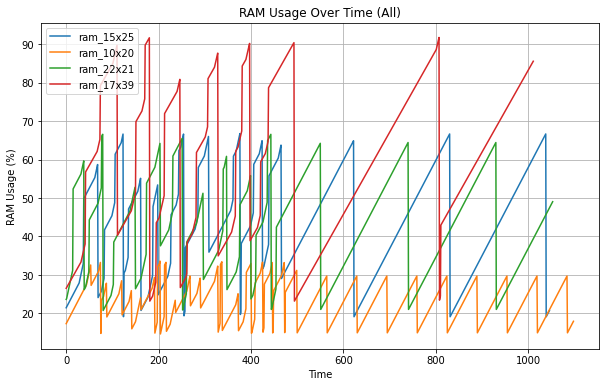

Stats for ram_15x25.txt:
Mean RAM Usage: 43.87%
Max RAM Usage: 66.74%
Min RAM Usage: 19.14%

Stats for ram_10x20.txt:
Mean RAM Usage: 23.09%
Max RAM Usage: 33.61%
Min RAM Usage: 14.66%

Stats for ram_22x21.txt:
Mean RAM Usage: 42.35%
Max RAM Usage: 66.56%
Min RAM Usage: 20.77%

Stats for ram_17x39.txt:
Mean RAM Usage: 59.56%
Max RAM Usage: 91.73%
Min RAM Usage: 23.20%



In [4]:
file_paths = ['ram_15x25.txt', 'ram_10x20.txt', 'ram_22x21.txt', 'ram_17x39.txt']
analyzer = RAMAnalyzer(file_paths)
analyzer.plot_all_together()  # Plot all lines in one plot
analyzer.plot_individual(save_path='./plots')  # Save individual line plots
analyzer.plot_box_plots(save_path='./plots')   # Save box plots for each line
stats = analyzer.get_stats()
for file, (mean, maximum, minimum) in stats.items():
    print(f"Stats for {file}:")
    print(f"Mean RAM Usage: {mean:.2f}%")
    print(f"Max RAM Usage: {maximum:.2f}%")
    print(f"Min RAM Usage: {minimum:.2f}%")
    print()